# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


In [3]:
cities

['cherskiy',
 'samarai',
 'horsham',
 'pevek',
 'ponta do sol',
 'kapaa',
 'copiapo',
 'bluff',
 'lata',
 'punta arenas',
 'khatanga',
 'yellowknife',
 'hithadhoo',
 'hobart',
 'rikitea',
 'barrow',
 'nouakchott',
 'kamaishi',
 'ushuaia',
 'hamilton',
 'east london',
 'taolanaro',
 'hami',
 'kamenskoye',
 'luau',
 'albany',
 'bonavista',
 'airai',
 'provideniya',
 'gigmoto',
 'waldkirchen',
 'muyezerskiy',
 'mataura',
 'ekhabi',
 'atuona',
 'attawapiskat',
 'udachnyy',
 'butaritari',
 'husavik',
 'hasaki',
 'jamestown',
 'georgetown',
 'port elizabeth',
 'nikolskoye',
 'arraial do cabo',
 'esperance',
 'lasa',
 'sirsi',
 'hanmer springs',
 'castro',
 'cape town',
 'chuy',
 'saint-georges',
 'kaitangata',
 'saskylakh',
 'kodiak',
 'onega',
 'mahebourg',
 'rupert',
 'tumannyy',
 'charcas',
 'isangel',
 'mangai',
 'college',
 'homer',
 'inuvik',
 'narsaq',
 'inongo',
 'busselton',
 'hermanus',
 'bengkulu',
 'muros',
 'ayr',
 'seoul',
 'kavaratti',
 'dzhusaly',
 'saint george',
 'saint ant

In [4]:
#cities = cities[:5]

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
units = "imperial"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+ "&q="+ city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =  city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | kieta
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | taoudenni
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | meulaboh
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | darhan
Processing Record 13 of Set 1 | grindavik
Processing Record 14 of Set 1 | sri aman
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | gornopravdinsk
Processing Record 21 of Set 1 | marcona
City not found. Skipping...
Processing Record 22 of Set 1 

Processing Record 35 of Set 4 | morant bay
Processing Record 36 of Set 4 | xanxere
Processing Record 37 of Set 4 | vestmanna
Processing Record 38 of Set 4 | guines
Processing Record 39 of Set 4 | salalah
Processing Record 40 of Set 4 | lokachi
Processing Record 41 of Set 4 | samoylovka
Processing Record 42 of Set 4 | nichinan
Processing Record 43 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 44 of Set 4 | kavaratti
Processing Record 45 of Set 4 | amderma
City not found. Skipping...
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | christchurch
Processing Record 48 of Set 4 | margate
Processing Record 49 of Set 4 | laguna
Processing Record 0 of Set 5 | kaeo
Processing Record 1 of Set 5 | malwan
City not found. Skipping...
Processing Record 2 of Set 5 | pisco
Processing Record 3 of Set 5 | jabinyanah
Processing Record 4 of Set 5 | bundaberg
Processing Record 5 of Set 5 | luhyny
Processing Record 6 of Set 5 | klaksvik
Processing Record 7 

Processing Record 27 of Set 8 | cherskiy
Processing Record 28 of Set 8 | makakilo city
Processing Record 29 of Set 8 | leningradskiy
Processing Record 30 of Set 8 | victoria
Processing Record 31 of Set 8 | vanavara
Processing Record 32 of Set 8 | lodwar
Processing Record 33 of Set 8 | maloco
Processing Record 34 of Set 8 | phalaborwa
Processing Record 35 of Set 8 | srandakan
Processing Record 36 of Set 8 | lata
Processing Record 37 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 38 of Set 8 | byron bay
Processing Record 39 of Set 8 | batticaloa
Processing Record 40 of Set 8 | walvis bay
Processing Record 41 of Set 8 | korla
Processing Record 42 of Set 8 | abu ghosh
Processing Record 43 of Set 8 | svetlogorsk
Processing Record 44 of Set 8 | bell ville
Processing Record 45 of Set 8 | kefar yona
Processing Record 46 of Set 8 | katsuura
Processing Record 47 of Set 8 | kalmunai
Processing Record 48 of Set 8 | hobyo
Processing Record 49 of Set 8 | viedma
Processing Rec

Processing Record 15 of Set 12 | kiama
Processing Record 16 of Set 12 | mersing
Processing Record 17 of Set 12 | haines junction
Processing Record 18 of Set 12 | san antonio
Processing Record 19 of Set 12 | malmo
Processing Record 20 of Set 12 | talakan
Processing Record 21 of Set 12 | zapolyarnyy
Processing Record 22 of Set 12 | sovetskiy
Processing Record 23 of Set 12 | vanimo
Processing Record 24 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 25 of Set 12 | malgrat de mar
Processing Record 26 of Set 12 | egvekinot
Processing Record 27 of Set 12 | chuka
Processing Record 28 of Set 12 | ballina
Processing Record 29 of Set 12 | asahi
Processing Record 30 of Set 12 | zaysan
Processing Record 31 of Set 12 | belaya gora
Processing Record 32 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 33 of Set 12 | leesburg
Processing Record 34 of Set 12 | mentok
City not found. Skipping...
Processing Record 35 of Set 12 | faya
Processing Record 36 of Set 12 |

In [6]:
#city_weather['sys']['country']

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saldanha,-33.0117,17.9442,68.05,82,0,8.39,ZA,1675999661
1,punta arenas,-53.1500,-70.9167,46.51,76,20,17.27,CL,1675999530
2,kieta,-6.2167,155.6333,85.51,67,95,5.55,PG,1675999662
3,bengkulu,-3.8004,102.2655,82.26,68,99,5.70,ID,1675999440
4,ushuaia,-54.8000,-68.3000,46.06,81,100,12.66,AR,1675999662


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saldanha,-33.0117,17.9442,68.05,82,0,8.39,ZA,1675999661
1,punta arenas,-53.1500,-70.9167,46.51,76,20,17.27,CL,1675999530
2,kieta,-6.2167,155.6333,85.51,67,95,5.55,PG,1675999662
3,bengkulu,-3.8004,102.2655,82.26,68,99,5.70,ID,1675999440
4,ushuaia,-54.8000,-68.3000,46.06,81,100,12.66,AR,1675999662


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [12]:
city_data_df['Lat']

City_ID
0     -33.0117
1     -53.1500
2      -6.2167
3      -3.8004
4     -54.8000
        ...   
547    -0.3582
548    33.2288
549    11.6667
550    30.4202
551    25.9667
Name: Lat, Length: 552, dtype: float64

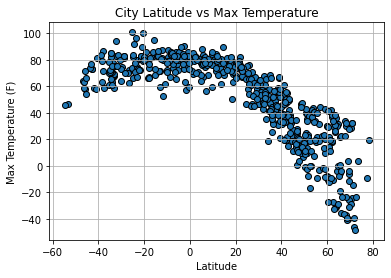

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
            marker="o",
           linewidths=1,
           edgecolor="black",
           label="Cities")


# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude Vs. Humidity

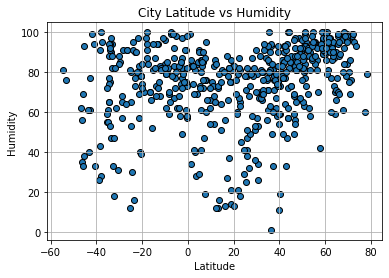

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
            city_data_df['Humidity'],
            marker="o",
           linewidths=1,
           edgecolor="black",
           label="Cities")

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

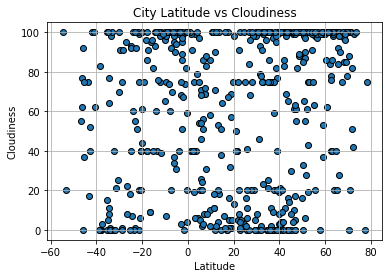

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
            city_data_df['Cloudiness'],
            marker="o",
           linewidths=1,
           edgecolor="black",
           label="Cities")

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

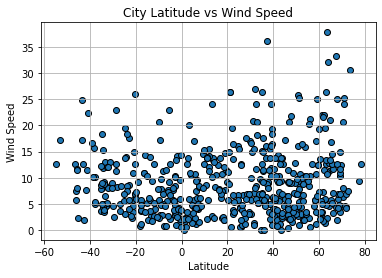

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
            city_data_df['Wind Speed'],
            marker="o",
           linewidths=1,
           edgecolor="black",
           label="Cities")

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png", bbox_inches="tight")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Lng"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
#print(regress_values)
#Line equation string:

line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,albany,42.6001,-73.9662,49.95,86,100,7.34,US,1675998984
7,taoudenni,22.6783,-3.9836,66.60,18,100,13.53,ML,1675999663
9,meulaboh,4.1363,96.1285,80.26,84,79,10.47,ID,1675999664
11,darhan,49.4867,105.9228,6.33,90,100,3.56,MN,1675999665
12,grindavik,63.8424,-22.4338,36.07,87,100,32.21,IS,1675999665


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saldanha,-33.0117,17.9442,68.05,82,0,8.39,ZA,1675999661
1,punta arenas,-53.1500,-70.9167,46.51,76,20,17.27,CL,1675999530
2,kieta,-6.2167,155.6333,85.51,67,95,5.55,PG,1675999662
3,bengkulu,-3.8004,102.2655,82.26,68,99,5.70,ID,1675999440
4,ushuaia,-54.8000,-68.3000,46.06,81,100,12.66,AR,1675999662


###  Temperature vs. Latitude Linear Regression Plot

y = -1.36x +92.83


AttributeError: module 'matplotlib.pyplot' has no attribute 'linregress'

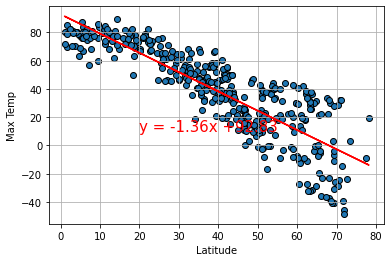

In [24]:
from scipy.stats import linregress

# Linear regression on Northern Hemisphere

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]

regress_values = x_values * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Line equation string
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation)

#Plot the chart
plt.scatter(northern_hemisphere_df['Lat'],
            northern_hemisphere_df['Max Temp'],
            marker="o",
           linewidths=1,
           edgecolor="black",
           label="Cities")
plt.plot(x_values, regress_values, "r-")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_equation,(20,10), fontsize=15, color="red")

plt.linregress(x_values, y_values, "Latitude", "Max Temp", "Northern", (50,70))

print(f"The r-value is: {rvalue**2}")
      

#Safe figure
plt.savefig("output_data/Fig5.png", bbox_inches="tight")
plt.show()

y = 0.25x +80.81


AttributeError: module 'matplotlib.pyplot' has no attribute 'linregress'

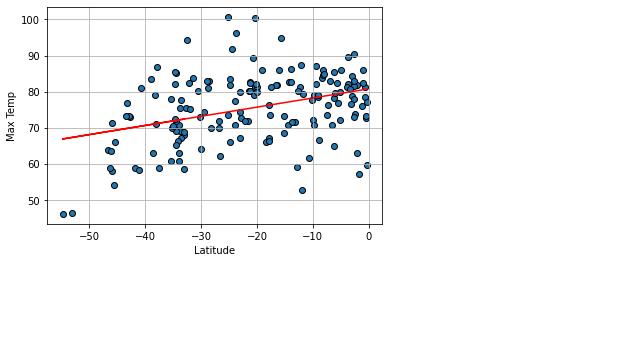

In [22]:
# Linear regression on Southern Hemisphere

x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]

regress_values = x_values * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Line equation string
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation)
#Plot the chart
plt.scatter(southern_hemisphere_df['Lat'],
            southern_hemisphere_df['Max Temp'],
            marker="o",
           linewidths=1,
           edgecolor="black",
           label="Cities")
plt.plot(x_values, regress_values, "r-")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_equation,(20,15), fontsize=15, color="red")

plt.linregress(x_values, y_values, "Latitude", "Max Temp", "Southern", (-40,75))

print(f"The r-value is: {rvalue**2}")
      

#Safe figure
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

y = 0.42x +59.23


AttributeError: module 'matplotlib.pyplot' has no attribute 'linregress'

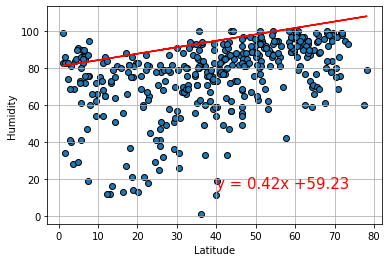

In [30]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]

regress_values = x_values * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Line equation string
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation)

#Plot the chart
plt.scatter(northern_hemisphere_df['Lat'],
            northern_hemisphere_df['Humidity'],
            marker="o",
           linewidths=1,
           edgecolor="black",
           label="Cities")
plt.plot(x_values, regress_values, "r-")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_equation,(40,15), fontsize=15, color="red")

plt.linregress(x_values, y_values, "Latitude", "Humidity", "Northern", (50,50))

print(f"The r-value is: {rvalue**2}")
      

#Safe figure
plt.savefig("output_data/Fig7.png", bbox_inches="tight")
plt.show()

y = 0.35x +80.92


AttributeError: module 'matplotlib.pyplot' has no attribute 'linregress'

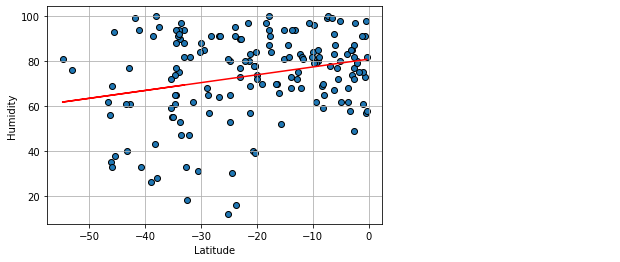

In [29]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]

regress_values = x_values * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Line equation string
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation)

#Plot the chart
plt.scatter(southern_hemisphere_df['Lat'],
            southern_hemisphere_df['Humidity'],
            marker="o",
           linewidths=1,
           edgecolor="black",
           label="Cities")
plt.plot(x_values, regress_values, "r-")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_equation,(20,15), fontsize=15, color="red")

plt.linregress(x_values, y_values, "Latitude", "Humidity", "Southern", (-70,75))

print(f"The r-value is: {rvalue**2}")
      

#Safe figure
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.44x +43.35


AttributeError: module 'matplotlib.pyplot' has no attribute 'linregress'

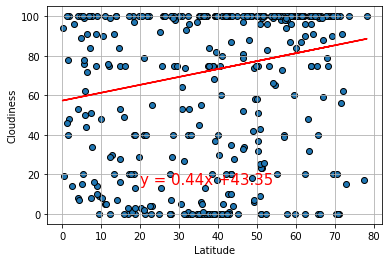

In [54]:
# Northern Hemisphere

northern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] >=0]
# Linear regression on Northern Hemisphere

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]

regress_values = x_values * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Line equation string
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation)

#Plot the chart
plt.scatter(northern_hemisphere_df['Lat'],
            northern_hemisphere_df['Cloudiness'],
            marker="o",
           linewidths=1,
           edgecolor="black",
           label="Cities")
plt.plot(x_values, regress_values, "r-")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_equation,(20,15), fontsize=15, color="red")

plt.linregress(x_values, y_values, "Latitude", "Cloudiness", "Northern", (20,60))

print(f"The r-value is: {rvalue**2}")
      

#Safe figure
plt.savefig("output_data/Fig9.png", bbox_inches="tight")
plt.show()

y = 0.73x +74.51


AttributeError: module 'matplotlib.pyplot' has no attribute 'linregress'

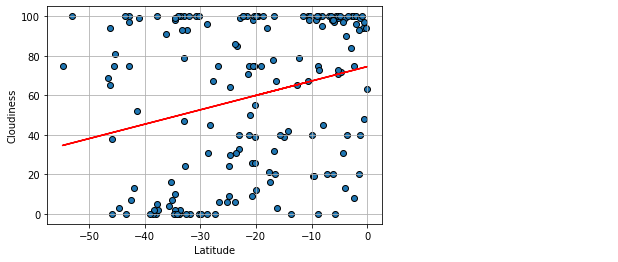

In [26]:
# Southern Hemisphere
southern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]

regress_values = x_values * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Line equation string
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation)

#Plot the chart
plt.scatter(southern_hemisphere_df['Lat'],
            southern_hemisphere_df['Cloudiness'],
            marker="o",
           linewidths=1,
           edgecolor="black",
           label="Cities")
plt.plot(x_values, regress_values, "r-")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_equation,(20,15), fontsize=15, color="red")

plt.linregress(x_values, y_values, "Latitude", "Cloudiness", "Southern", (-52,75))

print(f"The r-value is: {rvalue**2}")
      

#Safe figure
plt.savefig("output_data/Fig10.png",bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.04x +7.22


AttributeError: module 'matplotlib.pyplot' has no attribute 'linregress'

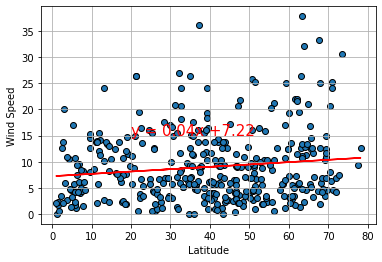

In [32]:
# Northern Hemisphere
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

northern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] >=0]
# Linear regression on Northern Hemisphere

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]

regress_values = x_values * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Line equation string
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation)

#Plot the chart
plt.scatter(northern_hemisphere_df['Lat'],
            northern_hemisphere_df['Wind Speed'],
            marker="o",
           linewidths=1,
           edgecolor="black",
           label="Cities")
plt.plot(x_values, regress_values, "r-")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_equation,(20,15), fontsize=15, color="red")

plt.linregress(x_values, y_values, "Latitude", "Wind Speed", "Northern", (40,40))

print(f"The r-value is: {rvalue**2}")
      

#Safe figure
plt.savefig("output_data/Fig11.png", bbox_inches="tight")
plt.show()

y = -0.1x +6.09


AttributeError: module 'matplotlib.pyplot' has no attribute 'linregress'

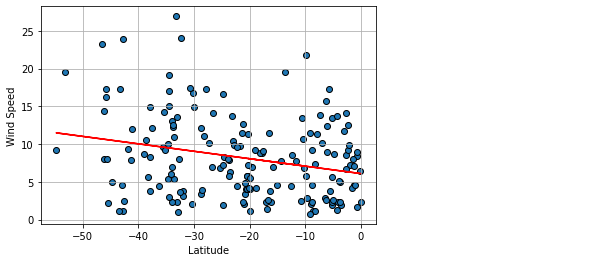

In [61]:
# Southern Hemisphere
southern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] < 0]

x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]

regress_values = x_values * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Line equation string
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation)

#Plot the chart
plt.scatter(southern_hemisphere_df['Lat'],
            southern_hemisphere_df['Wind Speed'],
            marker="o",
           linewidths=1,
           edgecolor="black",
           label="Cities")
plt.plot(x_values, regress_values, "r-")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_equation,(20,15), fontsize=15, color="red")

plt.linregress(x_values, y_values, "Latitude", "Wind Speed", "Southern", (-52,35))

print(f"The r-value is: {rvalue**2}")
      

#Safe figure
plt.savefig("output_data/Fig12.png",bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE